In [1]:
import numpy as np

In [2]:
# load the mnist dataset

def fetch(url):
  import requests, gzip, os, hashlib, numpy
  fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
  if os.path.isfile(fp):
    with open(fp, "rb") as f:
      dat = f.read()
  else:
    with open(fp, "wb") as f:
      dat = requests.get(url).content
      f.write(dat)
  return numpy.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()
X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [3]:
from torch import nn

class MnistNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(28*28, 128)
        self.act1 = nn.ReLU()
        self.l2 = nn.Linear(128, 10)
        self.act2 = nn.Softmax(dim=0)
    
    def forward(self, x):
        x = self.l1(x)
        x = self.act1(x)
        x = self.l2(x)
        #x = self.act2(x)
        return x



7.608068227767944


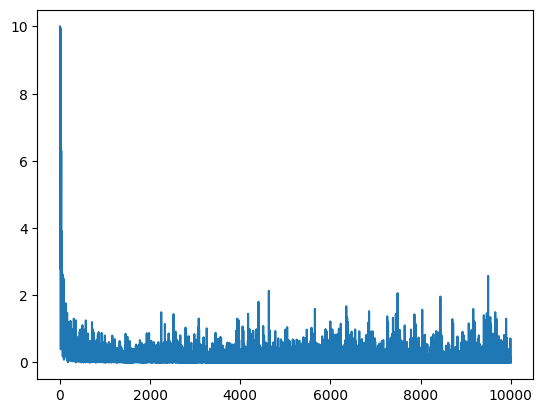

In [4]:
import torch
import math
import random
import matplotlib.pyplot as plt
import time

model = MnistNet()
batch_size = 32 # actuially makes it better

# train
loss_function = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters())
loses = []
st = time.time()
for i in range(10000):
    samp = np.random.randint(0, X_test.shape[0], size=(batch_size))
    inpt = torch.tensor(X_test[samp].reshape(-1, 28*28)).float()
    target = torch.tensor(Y_test[samp])
    optim.zero_grad()
    guess = model(inpt)
    #print(f"guess: {guess}, target: {target}")
    loss = loss_function(guess, target)
    loss.backward()
    optim.step()
    loses.append(min(loss.item(), 10))
et = time.time()
print(et-st)
plt.plot(loses)

In [5]:
corr = 0
for i in range(len(X_test)):
    X = torch.tensor(X_test[i].reshape((-1, 28*28))).float()
    Y = Y_test[i]
    guess = torch.argmax(model(X))
    if Y == guess: corr += 1
print(f"accuracy: {corr/len(X_test)*100}%")

accuracy: 98.88%


In [6]:
torch.save(model.state_dict(), "models/mnist_1.pt")